![title](../images/header.png)

# Vd - Merging eSBAE with new CEO points
-------
This notebook merges validated data from the systematic grid CEO data (2015-2022) with eSBAE points for estimation of areas.

This script requires minimum an m16 instance and select the python 3 kernel
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

### 1. Enter parameters

In [5]:
#identifier for country
# COD COG CMR GAB EQG CAF
iso = 'EQG'

### Read new CEO merged  files
after you run utils script 1. merge_clean_ceo_data.ipynb

In [6]:
ceo = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/EQG_all_ceo_1522_clean.csv')

2. read all esbae points with augmented data (output from script 5b)

In [7]:
# Read the CSV files
#CAR
esbae = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/EQG_esbae_1520_model.csv')
len(esbae)

22809

make a list of the ceo files for processing

In [8]:
# output file CEO validated data file with correct stratum with only CEO columns - used for area estimation
ceo_sel_data_out =  '/home/sepal-user/module_results/esbae/EQG/EQG_all_ceo_1522_strat.csv'

In [9]:
# output file for CEO data with new stratum with all eSBAE columns 
ceo_data_out =  '/home/sepal-user/module_results/esbae/EQG/EQG_esbae_allcols_ceo_1522.csv'

In [10]:
# output file name for eSBAE and CEO data merge - all points - caution, large file!
esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/EQG/EQG_esbae_w_ceo_1522.csv'

#### end of parameters

### 2. Clean up CEO and eSBAE data

In [11]:
column_names = ceo.columns.tolist()
# Print the list of column names
print(column_names)

['ID', 'plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Ref_Change_LCover_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg',

In [12]:
columns = esbae.columns.tolist()
# Print the list of column names
print(columns)

['geometry', 'point_id', 'ts', 'images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_m

In [13]:
ceo.head()

,ID,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_stable,DensDryFor_stable,SecFor_stable,DryOpenFor_stable,Mangrove_stable,Swamp_stable,Gallery_stable,Plantation_stable,Woodland_stable,ISO
0,0,45,45,45,8.460650,3.453988,POINT(8.46065 3.453988),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1.0,coll_1522_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,EQG
1,1,15952,15952,15952,10.827311,1.756878,POINT(10.827311 1.756878),0,non,0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,15.0,NaN,coll_1522_1,1,15,NF,NF_15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EQG
2,2,15936,15936,15936,10.747901,1.602624,POINT(10.747901 1.602624),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1.0,coll_1522_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,EQG
3,3,15893,15893,15893,10.534713,1.187889,POINT(10.534713 1.187889),1,NaN,1,Deg,1,0,1,0,1,0,NaN,0,0,0,2022.0,NaN,1.0,coll_1522_1,1,1,Deg2022,Deg_1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EQG
4,4,15847,15847,15847,10.906755,1.930372,POINT(10.906755 1.930372),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1.0,coll_1522_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,EQG


##### count points in different categories

In [14]:
pd.pivot_table(ceo,values='point_id',index=['Ref_Change_1522'],columns=['interpreted'],aggfunc="count")

interpreted,1
Ref_Change_1522,
0,4156
1,326


In [15]:
ceo['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1    3604
0     878
Name: count, dtype: int64

In [16]:
ceo['Ref_Change_Type_1522'].value_counts(dropna=False)

Ref_Change_Type_1522
Stable    3278
NF         878
Def        193
Deg        133
Name: count, dtype: int64

In [17]:
ceo['collection'].value_counts(dropna=False)

collection
coll_1522_2    3984
coll_1522_1     498
Name: count, dtype: int64

##### Check if values in 'pointid' are unique

In [18]:
# this might take some time
unique_check = ceo['point_id'].nunique() == len(ceo['point_id'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


##### if there are duplicates determine which points and which project (collection) and fix these in CEO: find the point id and enter the same correct interpretation for both users

In [19]:
# Find duplicate values in the 'ID' column
#duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='point_id', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
#len(duplicate_ids)

In [20]:
#column_shape = esbae['stratum'].shape

# Check if the column is one-dimensional
#if len(column_shape) == 1:
#    print("The column is one-dimensional.")
#    print("Number of elements:", column_shape[0])
#else:
#    print("The column is not one-dimensional.")
#    print("Shape:", column_shape)

##### Rename columns to be same as ceo file 

In [21]:
esbae = esbae.rename(columns={'PLOTID': 'plotid'})
esbae = esbae.rename(columns={'LAT': 'lat'})
esbae = esbae.rename(columns={'LON': 'lon'})

In [22]:
print(esbae.dtypes)

geometry                 object
point_id                float64
ts                       object
images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightne

In [23]:
#esbae.drop(columns=['stratum','dates','ts','interpreted'], inplace=True)

In [24]:
len(esbae)

22809

### 3. Merge ceo and sbae tables
replace validated points in esbae points

In [25]:
#make list of point_ids of validated points
validated_id_list = ceo['point_id'].tolist()
len(validated_id_list)

4482

In [26]:
# Merge ceo and sbae on "pointid" with an outer join
esbae_ceo = pd.merge(esbae, ceo, on='point_id', how='outer')

In [27]:
# Perform the merge operation to replace values in df1 with values from df2
# Use 'left' join to keep all rows from df1
esbae_ceo = esbae.merge(ceo, on='point_id', how='left')

In [28]:
print(esbae_ceo.dtypes)

geometry                   object
point_id                  float64
ts                         object
images                      int64
mon_images                  int64
bfast_change_date         float64
bfast_magnitude           float64
bfast_means               float64
cusum_change_date         float64
cusum_confidence          float64
cusum_magnitude           float64
red_mean                  float64
red_sd                    float64
red_min                   float64
red_max                   float64
nir_mean                  float64
nir_sd                    float64
nir_min                   float64
nir_max                   float64
swir1_mean                float64
swir1_sd                  float64
swir1_min                 float64
swir1_max                 float64
swir2_mean                float64
swir2_sd                  float64
swir2_min                 float64
swir2_max                 float64
ndfi_mean                 float64
ndfi_sd                   float64
ndfi_min      

In [29]:
len(esbae_ceo)

22809

In [30]:
esbae_ceo.head()

geometry  point_id  \
0  POINT (5.624505597429619 -1.452023427740736)       7.0   
1  POINT (11.324654609564226 2.161619960358233)   19561.0   
2  POINT (11.329633192695216 2.171254532098836)   19562.0   
3  POINT (11.329629971919246 2.151985538306313)   19683.0   
4   POINT (9.914446864445276 0.946719632894394)    9671.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

#### clean up _x and _y columns

In [31]:
merged_columns = esbae_ceo.columns.tolist()
print(merged_columns)

['geometry', 'point_id', 'ts', 'images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_m

In [32]:
#drop and columns
esbae_ceo = esbae_ceo.drop(['lon_y', 'lat_y','images'], axis=1)
esbae_ceo.columns = esbae_ceo.columns.str.replace('_x', '')
esbae_ceo.columns = esbae_ceo.columns.str.replace('_y', '')

In [33]:
print(esbae_ceo.columns.values)

['geometry' 'point_id' 'ts' 'mon_images' 'bfast_change_date'
 'bfast_magnitude' 'bfast_means' 'cusum_change_date' 'cusum_confidence'
 'cusum_magnitude' 'red_mean' 'red_sd' 'red_min' 'red_max' 'nir_mean'
 'nir_sd' 'nir_min' 'nir_max' 'swir1_mean' 'swir1_sd' 'swir1_min'
 'swir1_max' 'swir2_mean' 'swir2_sd' 'swir2_min' 'swir2_max' 'ndfi_mean'
 'ndfi_sd' 'ndfi_min' 'ndfi_max' 'brightness_mean' 'brightness_sd'
 'brightness_min' 'brightness_max' 'greenness_mean' 'greenness_sd'
 'greenness_min' 'greenness_max' 'wetness_mean' 'wetness_sd' 'wetness_min'
 'wetness_max' 'bs_slope_mean' 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min'
 'ewma_jrc_date' 'ewma_jrc_change' 'ewma_jrc_magnitude' 'mosum_jrc_date'
 'mosum_jrc_change' 'mosum_jrc_magnitude' 'cusum_jrc_date'
 'cusum_jrc_change' 'cusum_jrc_magnitude' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'esri_l

In [34]:
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].fillna(0)
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].astype(int)
esbae_ceo['interpreted'].value_counts(dropna=False)

interpreted
0    18327
1     4482
Name: count, dtype: int64

In [35]:
esbae_ceo['Ref_Change_Year_1522'].value_counts(dropna=False)

Ref_Change_Year_1522
NaN        18327
Stable      3278
NF           878
Def2017       42
Deg2018       38
Def2016       38
Def2018       32
Deg2017       31
Def2019       25
Def2020       25
Def2021       19
Deg2021       17
Deg2022       17
Deg2019       15
Def2022       12
Deg2016        9
Deg2020        6
Name: count, dtype: int64

In [59]:
#esbae_ceo.head()

In [60]:
esbae_ceo['kmeans_chg_1520'].value_counts(dropna=False)

kmeans_chg_1520
1    14503
2     6229
3     2077
Name: count, dtype: int64

In [61]:
#check points by change and stratum - using stratum from model, not from CEO file!
points_strata = pd.pivot_table(esbae_ceo, values = 'point_id', index = 'Ref_Change_Year_1522',columns = 'kmeans_chg_1520', aggfunc =  "count",dropna=False)
points_strata['Total'] = points_strata.sum(axis=1)
points_strata_with_totals = pd.pivot_table(esbae_ceo, values='point_id', index='Ref_Change_Year_1522', columns='kmeans_chg_1520', aggfunc='count', margins=True, margins_name='Total',dropna=False)

# Print the pivot table with row and column totals
points_strata_with_totals

kmeans_chg_1520,1,2,3,Total
Ref_Change_Year_1522,,,,
Def2016,3.0,6.0,29.0,38
Def2017,2.0,8.0,32.0,42
Def2018,NaN,7.0,25.0,32
Def2019,1.0,2.0,22.0,25
Def2020,NaN,5.0,20.0,25
Def2021,1.0,3.0,15.0,19
Def2022,1.0,2.0,9.0,12
Deg2016,NaN,3.0,6.0,9
Deg2017,3.0,9.0,19.0,31


In [39]:
#check points by change and stratum - using stratum from model, not from CEO file!
points_strata = pd.pivot_table(esbae_ceo, values = 'point_id', index = 'Ref_Change_Type_1522',columns = 'kmeans_chg_1520', aggfunc =  "count")
# Create the pivot table with row and column totals
points_strata_with_totals = pd.pivot_table(esbae_ceo, values='point_id', index='Ref_Change_Type_1522', columns='kmeans_chg_1520', aggfunc='count', margins=True, margins_name='Total')

# Print the pivot table with row and column totals
points_strata_with_totals

kmeans_chg_1520,1,2,3,Total
Ref_Change_Type_1522,,,,
Def,8,33,152,193
Deg,8,33,92,133
NF,28,271,579,878
Stable,889,1465,924,3278
Total,933,1802,1747,4482


In [40]:
esbae_ceo['sampling'] = 'systematic'

In [41]:
esbae_ceo['ISO'] = iso

In [42]:
ceo_column_names = esbae_ceo.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['geometry', 'point_id', 'ts', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'ele

### 4. export cleaned CEO data

In [43]:
validated_export = esbae_ceo[esbae_ceo['interpreted'] == 1]
num_rows = len(validated_export)
print(f"Number of rows: {num_rows}")

Number of rows: 4482


In [44]:
validated_export.to_csv(ceo_data_out,index=False)

In [56]:
# only export selected columns
ceo_export_columns = [ 'point_id', 'Change_Bin', 'Def_Bin', 'Deg_Bin','chg_prob_cafi1520','def_prob_cafi1520', 'deg_prob_cafi1520',
                      'stable_prob_cafi1520', 'kmeans_chg_1520', 'kmeans_def_1520', 'kmeans_deg_1520', 'plotid', 
                      'lon', 'lat', 'sampleid', 'sample_geom', 
                      'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 
                      'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype_2015', 
                      'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Def2016', 
                      'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 
                      'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF','sampling', 'ISO']

In [57]:
ceo_export = validated_export[ceo_export_columns]

In [58]:
ceo_export.to_csv(ceo_sel_data_out,index=True)

### 5. plot deforestation points by year

In [ ]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

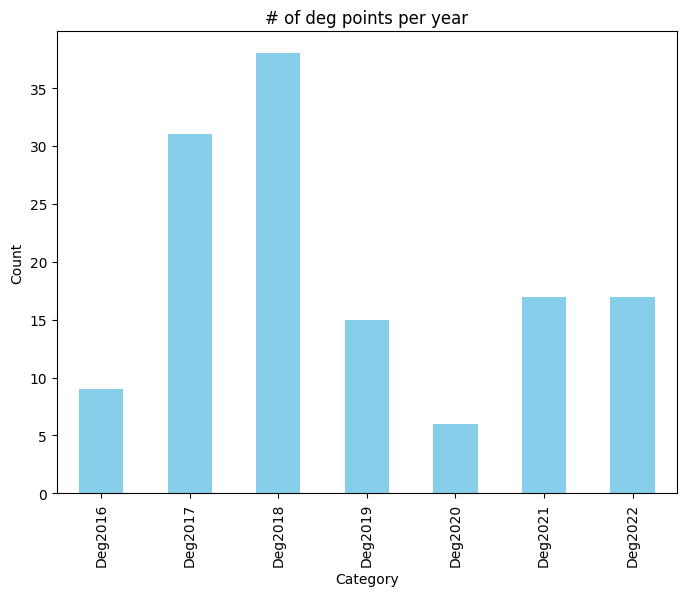

In [47]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [48]:
print(esbae_ceo.columns.values)

['geometry' 'point_id' 'ts' 'mon_images' 'bfast_change_date'
 'bfast_magnitude' 'bfast_means' 'cusum_change_date' 'cusum_confidence'
 'cusum_magnitude' 'red_mean' 'red_sd' 'red_min' 'red_max' 'nir_mean'
 'nir_sd' 'nir_min' 'nir_max' 'swir1_mean' 'swir1_sd' 'swir1_min'
 'swir1_max' 'swir2_mean' 'swir2_sd' 'swir2_min' 'swir2_max' 'ndfi_mean'
 'ndfi_sd' 'ndfi_min' 'ndfi_max' 'brightness_mean' 'brightness_sd'
 'brightness_min' 'brightness_max' 'greenness_mean' 'greenness_sd'
 'greenness_min' 'greenness_max' 'wetness_mean' 'wetness_sd' 'wetness_min'
 'wetness_max' 'bs_slope_mean' 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min'
 'ewma_jrc_date' 'ewma_jrc_change' 'ewma_jrc_magnitude' 'mosum_jrc_date'
 'mosum_jrc_change' 'mosum_jrc_magnitude' 'cusum_jrc_date'
 'cusum_jrc_change' 'cusum_jrc_magnitude' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'esri_l

In [49]:
merged_annual_counts = esbae_ceo['Ref_Change_Year_1522'].value_counts()
merged_annual_counts = merged_annual_counts.sort_index()
merged_annual_counts

Ref_Change_Year_1522
Def2016      38
Def2017      42
Def2018      32
Def2019      25
Def2020      25
Def2021      19
Def2022      12
Deg2016       9
Deg2017      31
Deg2018      38
Deg2019      15
Deg2020       6
Deg2021      17
Deg2022      17
NF          878
Stable     3278
Name: count, dtype: int64

In [52]:
LC_counts = esbae_ceo['Ref_LCover_2015'].value_counts()
LC_counts = merged_annual_counts.sort_index()
LC_counts

Ref_Change_Year_1522
Def2016      38
Def2017      42
Def2018      32
Def2019      25
Def2020      25
Def2021      19
Def2022      12
Deg2016       9
Deg2017      31
Deg2018      38
Deg2019      15
Deg2020       6
Deg2021      17
Deg2022      17
NF          878
Stable     3278
Name: count, dtype: int64

In [53]:
print(esbae_ceo.dtypes)

geometry                   object
point_id                  float64
ts                         object
mon_images                  int64
bfast_change_date         float64
bfast_magnitude           float64
bfast_means               float64
cusum_change_date         float64
cusum_confidence          float64
cusum_magnitude           float64
red_mean                  float64
red_sd                    float64
red_min                   float64
red_max                   float64
nir_mean                  float64
nir_sd                    float64
nir_min                   float64
nir_max                   float64
swir1_mean                float64
swir1_sd                  float64
swir1_min                 float64
swir1_max                 float64
swir2_mean                float64
swir2_sd                  float64
swir2_min                 float64
swir2_max                 float64
ndfi_mean                 float64
ndfi_sd                   float64
ndfi_min                  float64
ndfi_max      

In [54]:
columns_to_convert = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','NF']
esbae_ceo[columns_to_convert] = esbae_ceo[columns_to_convert].fillna(0)
esbae_ceo[columns_to_convert] = esbae_ceo[columns_to_convert].astype(int)

### 6. export merged esbae and ceo data to one csv file for next step

In [55]:
esbae_ceo.to_csv(esbae_ceo_data_out,index=False)